# Part I - (Analysis of Loan Data from Prosper)
## by (Abdulraqib Omotosho)

## Introduction
The dataset I will be exploring and visualizing for this project is the [Loan Data from Prosper](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1676827485502191&usg=AOvVaw1C3wctFYsHg01Gb5Eopirm) gotten from Udacity's curated datasets.
This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

This notebook explores the dataset for the purpose of Exploratory Data Analysis and Explanatory Data Analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

%matplotlib inline

> Loading the dataset and describing its properties.

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The dataset contains 113,937 rows with 81 features. Most of the variables are numeric in nature while others are ordered factor variables such as `EmploymentStatus`, `IncomeRange`, `ListingCategory`, `Loan Status`, etc.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in finding out the features related to the borrowers and the loans they took.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Of the many features available in the dataset, I expect the following to be of great help in my exploration;
- `Term`: The length of the loan expressed in months
- `LoanStatus`: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- `StatedMonthlyIncome`: The monthly income the borrower stated at the time the listing was created.
- `BorrowerAPR`: The Borrower's Annual Percentage Rate (APR) for the loan.
- `BorrowerRate`: The Borrower's interest rate for this loan.
- `BorrowerState`: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- `ProsperScore`: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- `ListingCategory (numeric)`: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
- `EmploymentStatus`: The employment status of the borrower at the time they posted the listing.
- `IsBorrowerHomeowner`: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- `IncomeRange`: The income range of the borrower at the time the listing was created.
- `Occupation`: The Occupation selected by the Borrower at the time they created the listing.
- `DebtToIncomeRatio`: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- `TotalProsperLoans`: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.
- `LoanOriginalAmount`: The origination amount of the loan.
- `Investors`: The number of investors that funded the loan.
- `LoanOriginationDate`: The date the loan was originated.

### Selecting the features of interest.

In [6]:
to_use = ['Term', 'LoanStatus', 'StatedMonthlyIncome', 'BorrowerAPR', 'BorrowerRate', 'BorrowerState', 'ProsperScore',
          'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'Occupation', 'DebtToIncomeRatio', 
          'TotalProsperLoans', 'LoanOriginalAmount', 'Investors', 'LoanOriginationDate']

In [7]:
loans = df[to_use]
loans.head()

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,Occupation,DebtToIncomeRatio,TotalProsperLoans,LoanOriginalAmount,Investors,LoanOriginationDate
0,36,Completed,3083.333333,0.16516,0.1580,CO,NaN,0,Self-employed,True,"$25,000-49,999",Other,0.17,NaN,9425,258,2007-09-12 00:00:00
1,36,Current,6125.000000,0.12016,0.0920,CO,7.0,2,Employed,False,"$50,000-74,999",Professional,0.18,NaN,10000,1,2014-03-03 00:00:00
2,36,Completed,2083.333333,0.28269,0.2750,GA,NaN,0,Not available,False,Not displayed,Other,0.06,NaN,3001,41,2007-01-17 00:00:00
3,36,Current,2875.000000,0.12528,0.0974,GA,9.0,16,Employed,True,"$25,000-49,999",Skilled Labor,0.15,NaN,10000,158,2012-11-01 00:00:00
4,36,Current,9583.333333,0.24614,0.2085,MN,4.0,2,Employed,True,"$100,000+",Executive,0.26,1.0,15000,20,2013-09-20 00:00:00


In [8]:
import warnings;warnings.filterwarnings('ignore')
# convert 'LoanOriginationDate' data type to datetime and extract year, month and week from it
loans.LoanOriginationDate = pd.to_datetime(loans.LoanOriginationDate)
loans['Year'] = loans.LoanOriginationDate.dt.year
loans['Month'] = loans.LoanOriginationDate.dt.strftime('%B')
loans['Week'] = loans.LoanOriginationDate.dt.week

#convert the numeric values in the Listing Category to object and change the column data type.
mapping = {0: 'Not available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use',
          6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Enagement Ring', 12: 'Green Loans',
          13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',
           20: 'Wedding Loans'}

loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace(mapping)
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].astype(object)
loans = loans.rename(columns={'ListingCategory (numeric)': 'Listing Category'})

In [9]:
loans.head(1)

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ProsperScore,Listing Category,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,Occupation,DebtToIncomeRatio,TotalProsperLoans,LoanOriginalAmount,Investors,LoanOriginationDate,Year,Month,Week
0,36,Completed,3083.333333,0.16516,0.158,CO,NaN,Not available,Self-employed,True,"$25,000-49,999",Other,0.17,NaN,9425,258,2007-09-12,2007,September,37


In [10]:
print(loans.shape)
print(loans.dtypes)

(113937, 20)
Term                            int64
LoanStatus                     object
StatedMonthlyIncome           float64
BorrowerAPR                   float64
BorrowerRate                  float64
BorrowerState                  object
ProsperScore                  float64
Listing Category               object
EmploymentStatus               object
IsBorrowerHomeowner              bool
IncomeRange                    object
Occupation                     object
DebtToIncomeRatio             float64
TotalProsperLoans             float64
LoanOriginalAmount              int64
Investors                       int64
LoanOriginationDate    datetime64[ns]
Year                            int64
Month                          object
Week                            int64
dtype: object


In [11]:
loans.describe()

,Term,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,ProsperScore,DebtToIncomeRatio,TotalProsperLoans,LoanOriginalAmount,Investors,Year,Week
count,113937.000000,1.139370e+05,113912.000000,113937.000000,84853.000000,105383.000000,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,40.830248,5.608026e+03,0.218828,0.192764,5.950067,0.275947,1.421100,8337.01385,80.475228,2011.042611,26.953860
std,10.436212,7.478497e+03,0.080364,0.074818,2.376501,0.551759,0.764042,6245.80058,103.239020,2.506634,15.520827
min,12.000000,0.000000e+00,0.006530,0.000000,1.000000,0.000000,0.000000,1000.00000,1.000000,2005.000000,1.000000
25%,36.000000,3.200333e+03,0.156290,0.134000,4.000000,0.140000,1.000000,4000.00000,2.000000,2008.000000,13.000000
50%,36.000000,4.666667e+03,0.209760,0.184000,6.000000,0.220000,1.000000,6500.00000,44.000000,2012.000000,28.000000
75%,36.000000,6.825000e+03,0.283810,0.250000,8.000000,0.320000,2.000000,12000.00000,115.000000,2013.000000,41.000000
max,60.000000,1.750003e+06,0.512290,0.497500,11.000000,10.010000,8.000000,35000.00000,1189.000000,2014.000000,53.000000


In [12]:
for i, col in enumerate(loans.columns):
    print('Value counts for {}: '.format(col))
    print(loans[col].value_counts())
    if i < len(loans.columns) - 1:
        print('-' * 100)

Value counts for Term: 
36    87778
60    24545
12     1614
Name: Term, dtype: int64
----------------------------------------------------------------------------------------------------
Value counts for LoanStatus: 
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
----------------------------------------------------------------------------------------------------
Value counts for StatedMonthlyIncome: 
4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       

In [13]:
import warnings;warnings.simplefilter(action='ignore')

# convert LoanStatus, EmploymentStatus, and IncomeRange into ordered categorical types
ordinal_var_dict = {
                    'LoanStatus': ['Cancelled', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)', 'Past Due (61-90 days)',
                                   'Past Due (31-60 days)', 'Past Due (16-30 days)', 'Past Due (1-15 days)', 'Chargedoff',
                                  'Current', 'FinalPaymentInProgress', 'Completed'],
                    'EmploymentStatus': ['Not available', 'Not employed', 'Self-employed', 'Part-time', 
                                         'Employed', 'Full-time', 'Retired', 'Other'],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999', '$100,000+']
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [14]:
cats = loans[ordinal_var_dict]
for i, col in enumerate(cats.columns):
    print('Unique values for {}: '.format(col))
    print(cats[col].unique())
    if i < len(cats.columns) - 1:
        print('-' * 328)

Unique values for LoanStatus: 
['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', ..., 'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)']
Length: 12
Categories (12, object): ['Cancelled' < 'Defaulted' < 'Past Due (>120 days)' < 'Past Due (91-120 days)' ... 'Chargedoff' < 'Current' < 'FinalPaymentInProgress' < 'Completed']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values for EmploymentStatus: 
['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', NaN, 'Not employed', 'Part-time', 'Retired']
Categories (8, object): ['Not available' < 'Not employed' < 'Self-employed' < 'Part-time' < 'Emp

## Univariate Exploration
Exploring the distributions of individual features.

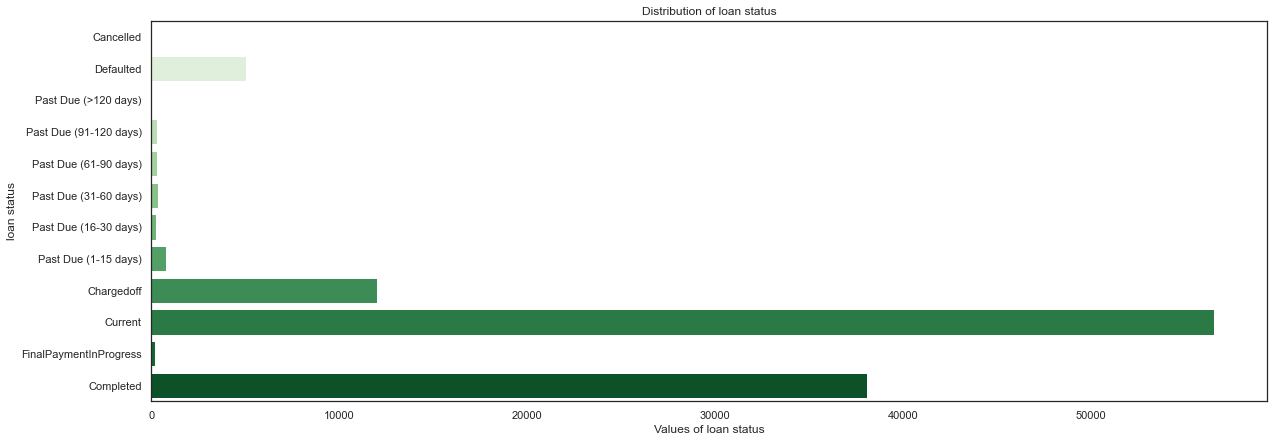

In [15]:
# exploring the statuses of loans that were took.
plot = loans.LoanStatus.value_counts()
x = plot.index
y = plot.values
plt.figure(figsize=[20,7])
sns.barplot(y=plot.index, x=plot.values, palette='Greens').set(xlabel='Values of loan status',
                                                              ylabel='loan status', title='Distribution of loan status')
plt.show();

The most common loan status amongst the borrowers is **Current**.

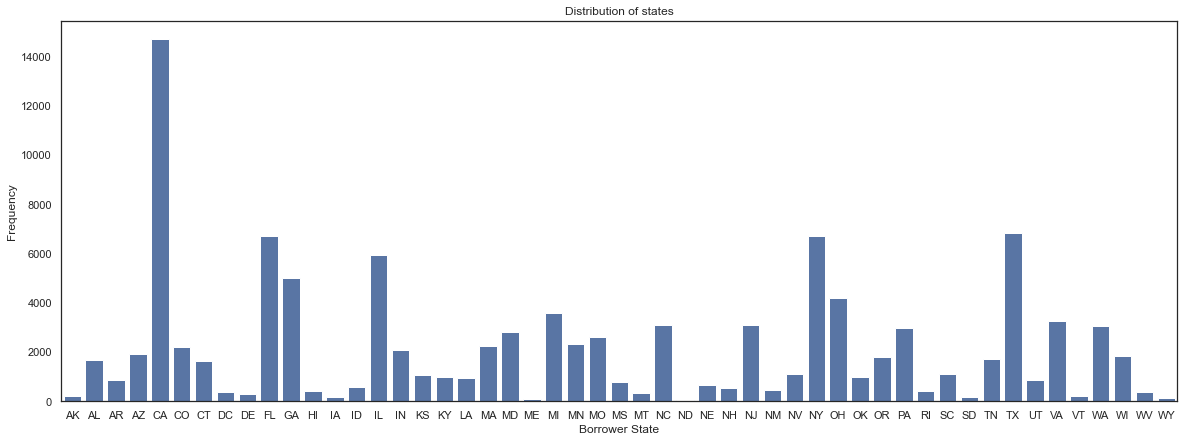

In [16]:
# exploring the distribution of states.
plot = loans.BorrowerState
plot = plot.sort_values(ascending=True)
color = sns.color_palette()[0]
plt.figure(figsize=[20,7])
sns.countplot(plot, color=color).set(xlabel='Borrower State', ylabel='Frequency', title='Distribution of states');

Majority of the borrowers originated from **California (CA)**

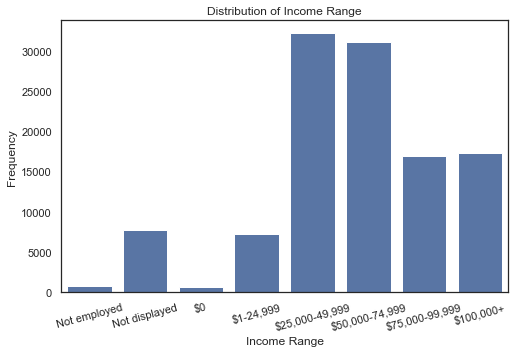

In [17]:
# exploring the Income range of the borrowers
plot = loans.IncomeRange
color = sns.color_palette()[0]
plt.figure(figsize=[8,5])
sns.countplot(plot, color=color).set(xlabel='Income Range', ylabel='Frequency', title='Distribution of Income Range')
plt.xticks(rotation=15);

Majority of the borrowers had an income range between `$25,000-$50,000`.

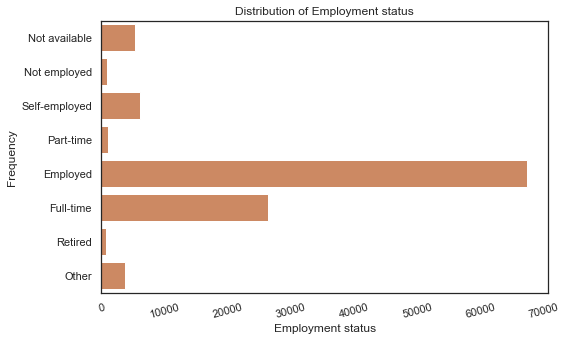

In [18]:
# employment status of the borrowers
plot = loans.EmploymentStatus.value_counts()
x = plot.values
y = plot.index
plt.figure(figsize=[8,5])
color = sns.color_palette()[1]
sns.barplot(x=x, y=y, color=color).set(xlabel='Employment status',
                                      ylabel='Frequency', title='Distribution of Employment status')
plt.xticks(rotation=15);

The majority of the borrowers are **Employed and Full-time**

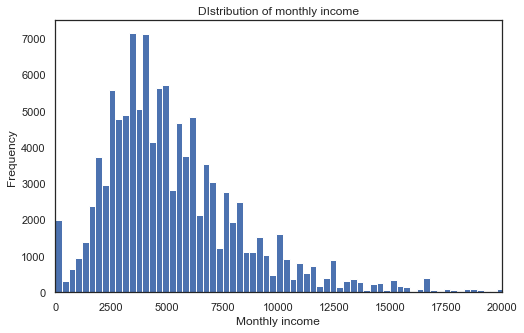

In [19]:
# distribution of monthly income plotted with more bins
bins = np.arange(0, loans.StatedMonthlyIncome.max()+300, 300)
plt.figure(figsize=[8,5])
plt.hist(x=loans.StatedMonthlyIncome, bins=bins)
plt.title('DIstribution of monthly income')
plt.xlabel('Monthly income')
plt.ylabel('Frequency')
plt.xlim(0, 20000);

The monthly income of the borrowers is positively skewed with majority of the borrowers having an income less than $5,000

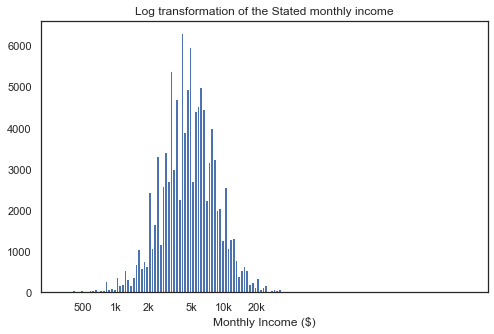

In [20]:
# using a log transformation for the stated monthly income viz
log_binsize = 0.025
bins = 10 ** np.arange(2.5, np.log10(loans['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,5])
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.title('Log transformation of the Stated monthly income')
plt.xlabel('Monthly Income ($)')
plt.show();

Became much more skewed to the right

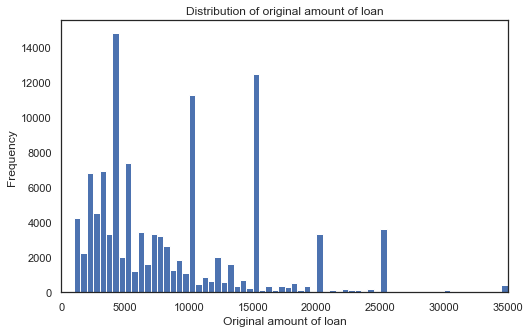

In [21]:
# Distribution of the original amount of loan taken
plot = loans.LoanOriginalAmount
bins = np.arange(0, loans.LoanOriginalAmount.max()+500, 500)
plt.figure(figsize=[8,5])
plt.hist(plot, bins=bins)
plt.title('Distribution of original amount of loan')
plt.xlabel('Original amount of loan')
plt.ylabel('Frequency')
plt.xlim([0, 35000]);

Most borrowers took about $5,000 as loan.

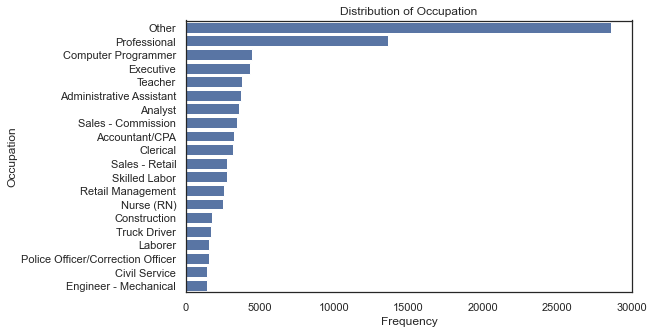

In [22]:
# occupation of borrowers
plot = loans.Occupation.value_counts()[:20]
plt.figure(figsize=[8,5])
x = plot.index
y = plot.values
color = sns.color_palette()[0]
sns.barplot(x=y, y=x, order=x, color=color).set(title='Distribution of Occupation', xlabel='Frequency', ylabel='Occupation')
plt.show();

Most borrowers had other occupations apart from the ones provided in the listing. Professionals are also common among the borrowers

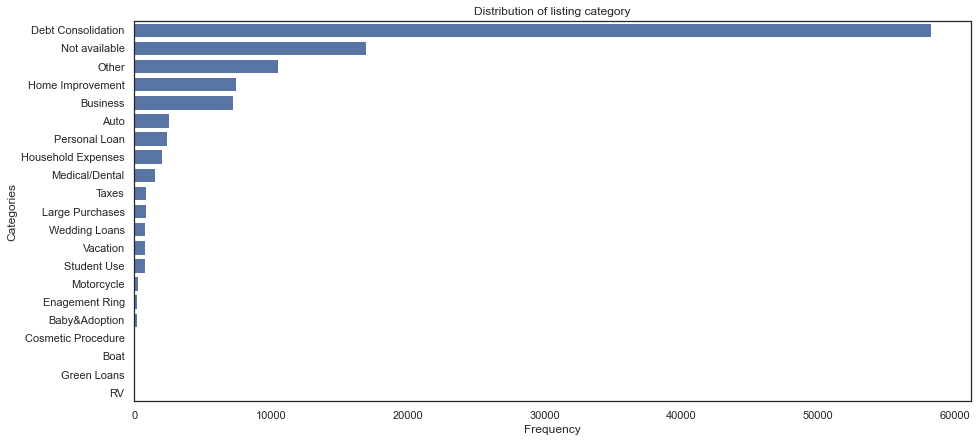

In [23]:
# listing category
plot = loans['Listing Category'].value_counts()
x = plot.index
y = plot.values
color = sns.color_palette()[0]
plt.figure(figsize=[15,7])
sns.barplot(x=y, y=x, color=color, order=x).set(
    title='Distribution of listing category', xlabel='Frequency', ylabel='Categories')
plt.show();

A vast majority applied for debt consolidation loans while 16965 borrowers didn't have their listing available.

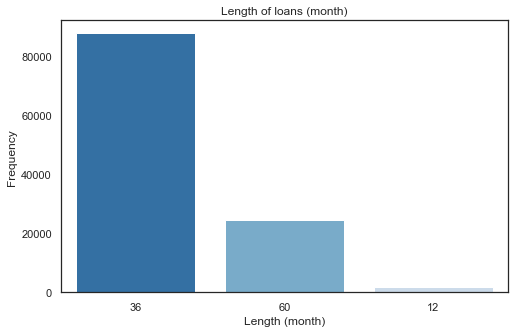

In [24]:
# term distribution
plot = loans.Term
plt.figure(figsize=[8,5])
sns.countplot(plot, order=loans.Term.value_counts().index, palette='Blues_r').set(title='Length of loans (month)', 
                                                               xlabel='Length (month)', ylabel='Frequency')
plt.show();

A large bloc of borrowers applied for a loan for 36 months while a very small number applied for the shortest loan term -12 months. 

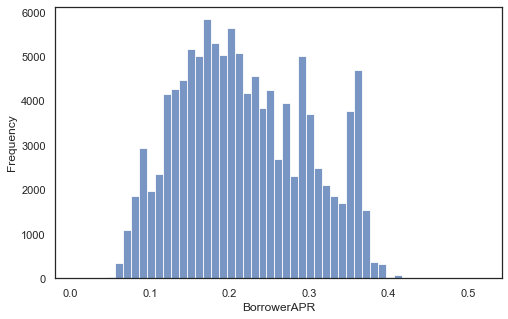

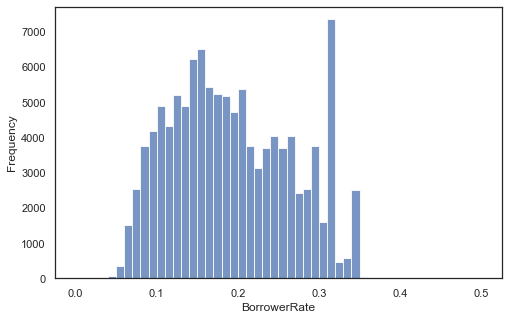

In [25]:
# borrower APR and Interest Rate
review = loans[['BorrowerAPR', 'BorrowerRate']]
for i in review:
    plt.figure(figsize=[8,5])
    bins = np.arange(min(loans[i].values), max(loans[i].values)+0.01, 0.01)
    sns.histplot(review[i], bins=bins).set(xlabel='{}'.format(i), ylabel='Frequency')
    plt.show();

The Borrowers's APR and Interest rates distributions are very similar which may indicate that the two features are highly correlated.

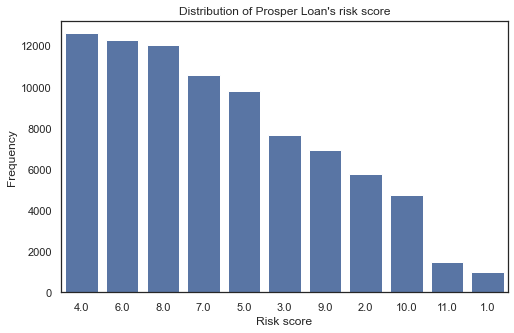

In [26]:
# prosper loan risk score
plot = loans.ProsperScore
color = sns.color_palette()[0]
plt.figure(figsize=[8,5])
sns.countplot(plot, order=plot.value_counts().index, color=color).set(
    title='Distribution of Prosper Loan\'s risk score', xlabel='Risk score', ylabel='Frequency')
plt.show();

Most borrowers have a risk score of 4.0 which is very close to bad while about 5000 borrowers had a perfect risk score.

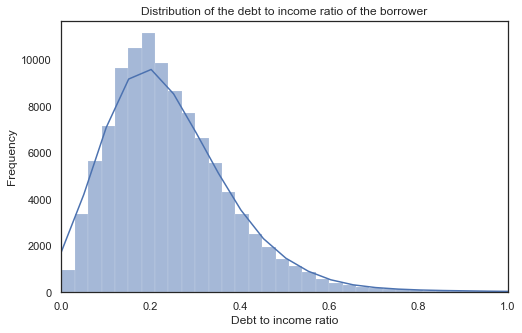

In [27]:
# debt to income ratio
bins = (np.arange(0, loans.DebtToIncomeRatio.max()+0.03, 0.03))
plt.figure(figsize=[8,5])
color = sns.color_palette()[0]
sns.histplot(data= loans, x='DebtToIncomeRatio', bins=bins, kde=True, color=color).set(
title='Distribution of the debt to income ratio of the borrower', xlabel='Debt to income ratio', ylabel='Frequency')
plt.xlim([0, 1])
plt.show();

The debt to income ratio distribution is highly skewed to the right and hence highly positively skewed

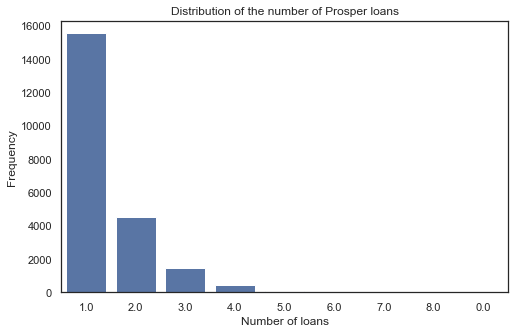

In [28]:
# number of prosper loans
plot = loans.TotalProsperLoans
color = sns.color_palette()[0]
plt.figure(figsize=[8,5])
sns.countplot(plot, order=plot.value_counts().index, color=color).set(
    title='Distribution of the number of Prosper loans', xlabel='Number of loans', ylabel='Frequency')
plt.show();

A large bloc of the borrowers had only one prosper loan and a single borrower took the highest loan -8.

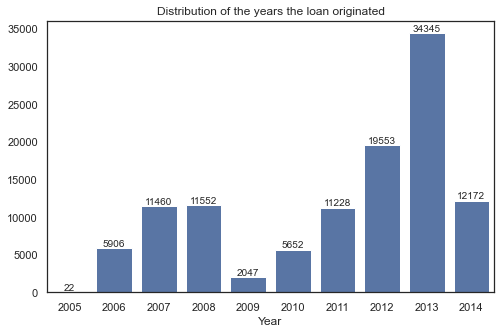

In [30]:
# year loans originated
plot = loans.Year.value_counts().sort_index()
x = plot.index
y = plot.values
color = sns.color_palette()[0]
plt.figure(figsize=[8,5])
sns.barplot(x=x, y=y, color=color, order=x).set(
    title='Distribution of the years the loan originated', xlabel='Year')
for i, v in enumerate(plot):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
plt.show();

About 34,500 loans originated in the year 2013 which is the highest of any year while the fewest occurred in 2005.

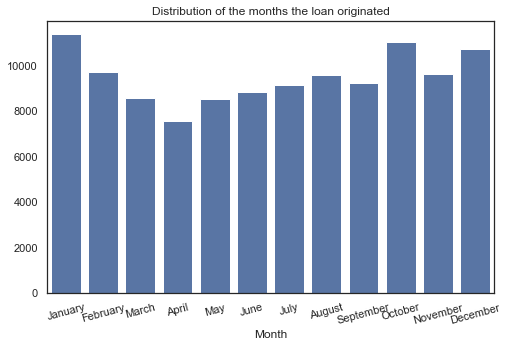

In [32]:
# months loans originated
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plot = loans.Month.value_counts()
x = plot.index
y = plot.values
color = sns.color_palette()[0]
plt.figure(figsize=[8,5])
sns.barplot(x=x, y=y, color=color, order=month_order).set(
    title='Distribution of the months the loan originated', xlabel='Month')
plt.xticks(rotation=15)
plt.show();

Most borrowers took a loan at the beginning of the year while fewer borrowers took loans around the spring.

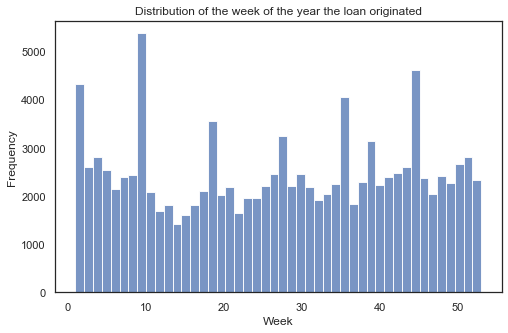

In [33]:
# week of loan origin
plot = loans.Week
color = sns.color_palette()[0]
bins = np.arange(0, loans.Week.max()+2, 1)
plt.figure(figsize=[8,5])
sns.histplot(plot).set(
    title='Distribution of the week of the year the loan originated', xlabel='Week', ylabel='Frequency')
plt.show();

Most borrowers took loans in the 10th week of the year

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Yeah. I had to make some transformations. The `LoanOriginationDate` variable had to be transformed into years, months and weeks of the year to enable me gain more insights into the time people started taking Prosper loans. Apart from others that didn't have their occupation listed, professionals were the most common borrowers at Prosper loans. Majority of the borrowers have their loan status at current and are employed or either Full-time. The term of most loans was pegged at 36 months while a small minority took a loan of a year. A large faction of borrowers originated from California and took their loans at the beginning of the year with the most loans also originating from 2013. The listing category of a majority of the loans was for Debt consolidation purposes. Again, most borrowers have a not so good risk score of 4.0.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The `LoanOriginationDate` variable was originally recorded as an object type variable instead of a datetime. Again, the Listing category variable was an integer which I also had to map onto the alpha equivalent which I sourced from the internet. I also converted the data type to an object data type.

## Bivariate Exploration
In this section, I investigated relationships between pairs of variables in the data.

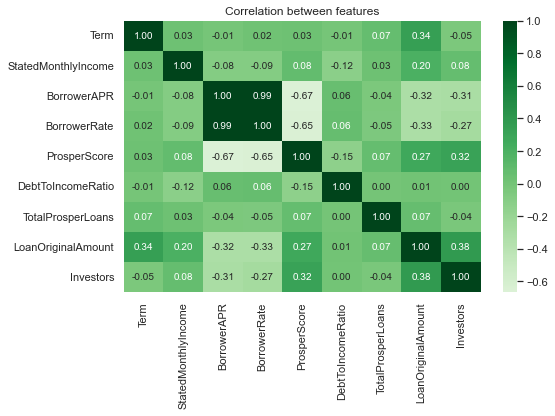

In [34]:
# correlation matrix of numeric variables
numeric_vars = ['Term', 'StatedMonthlyIncome', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 
                'DebtToIncomeRatio', 'TotalProsperLoans', 'LoanOriginalAmount', 'Investors']

plt.figure(figsize=[8,5])
sns.heatmap(loans[numeric_vars].corr(), fmt='.2f', annot=True, cmap='Greens', center=0).set(title='Correlation between features');

As can be seen above, `BorrowerAPR` and `BorrowerRate` have a very high correlation. `Investors` also have a correlation of 0.38 with `LoanOriginalAMount`.

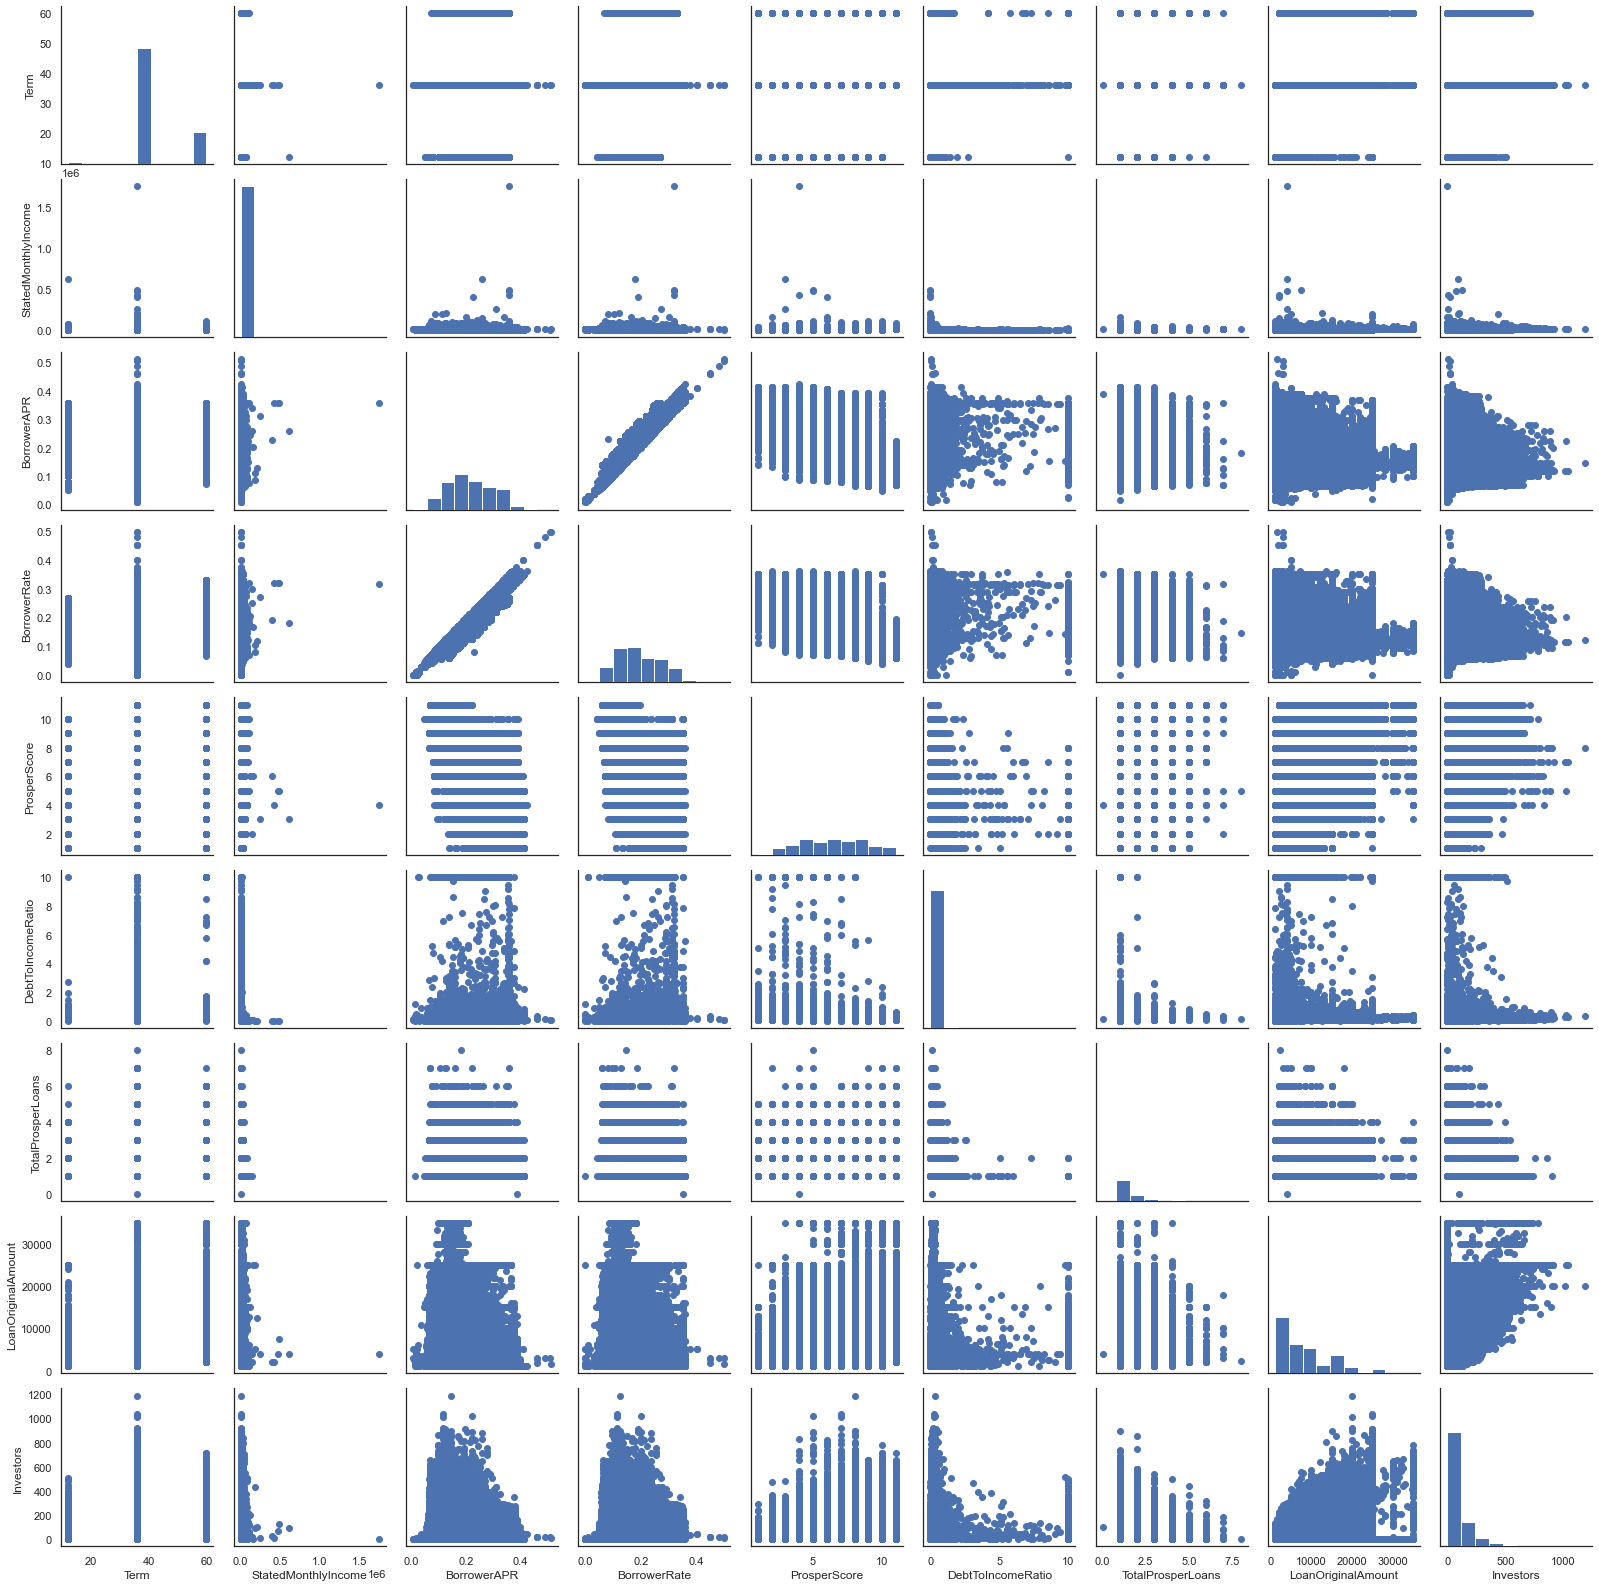

In [35]:
plot_sample = np.random.choice(loans[numeric_vars].shape[0], 500, replace=False)
loans_plot_sample =  loans[numeric_vars].loc[plot_sample]
g = sns.PairGrid(data=loans, vars=loans_plot_sample)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

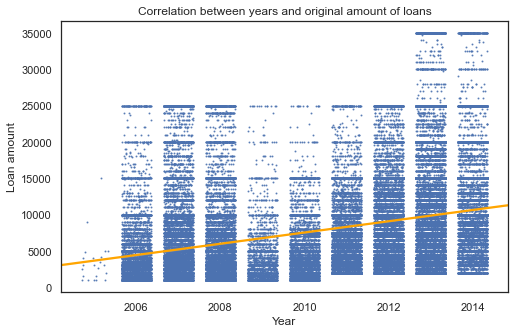

In [46]:
# Correlation between years and original amount of loans
plt.figure(figsize=[8,5])
sns.regplot(data=loans, x='Year', y='LoanOriginalAmount', truncate=False, x_jitter=0.35, scatter_kws={'s': 1}, line_kws={'color': 'orange'}).set(
    title='Correlation between years and original amount of loans', xlabel='Year', ylabel='Loan amount');

There is a positive correlation between `Year` and `LoanOriginalAmount`. 

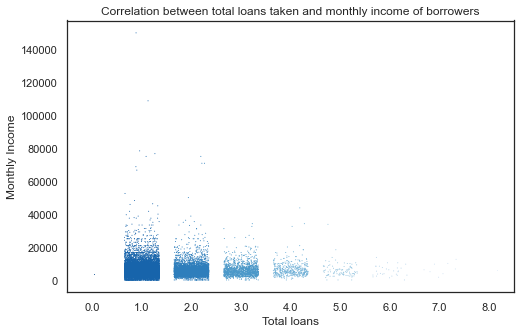

In [45]:
# Correlation between total loans taken and monthly income of borrowers
plt.figure(figsize = [8,5])
sns.stripplot(data=loans, x='TotalProsperLoans', y='StatedMonthlyIncome', size=1, jitter=0.35, palette='Blues_r').set(
title='Correlation between total loans taken and monthly income of borrowers', xlabel='Total loans', ylabel='Monthly Income')
plt.show();

The borrowers with the highest monthly income took the least number of loans while those with the most loans taken are the low income earners. It can be noted that `TotalProsperLoans` is negatively correlated with `StatedMonthlyIncome`

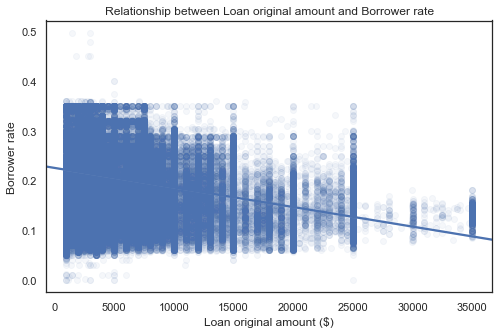

In [25]:
# regplot of BorrowerRate and LoanOriginalAmount
plt.figure(figsize=[8,5])
sns.regplot(data=loans, x='LoanOriginalAmount', y='BorrowerRate', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20})
plt.title('Relationship between Loan original amount and Borrower rate')
plt.xlabel('Loan original amount ($)')
plt.ylabel('Borrower rate');

Range of BorrowerRate decreases with an increase of loan amount.

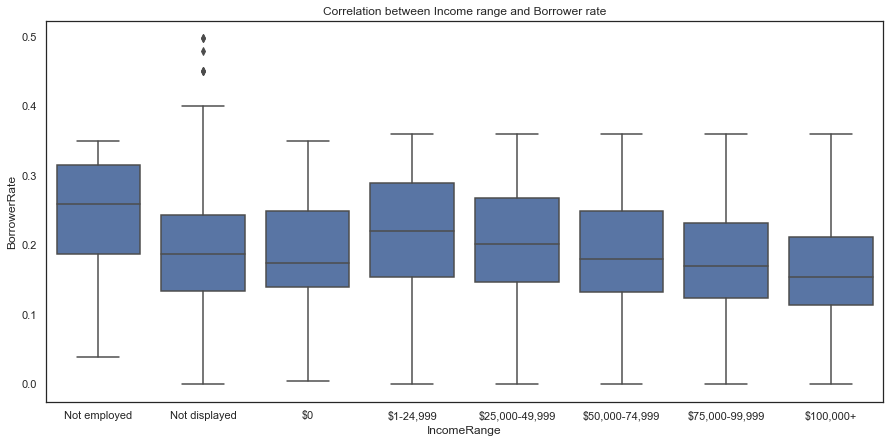

In [39]:
# boxplot of IncomeRange vs BorrowerRate
plt.figure(figsize=[15,7])
color = sns.color_palette()[0]
sns.boxplot(data=loans, x='IncomeRange', y='BorrowerRate', color=color).set(title='Correlation between Income range and Borrower rate');

The **not displayed** IncomeRange has a sizeable number of outliers. It also has the highest value of interest rate.

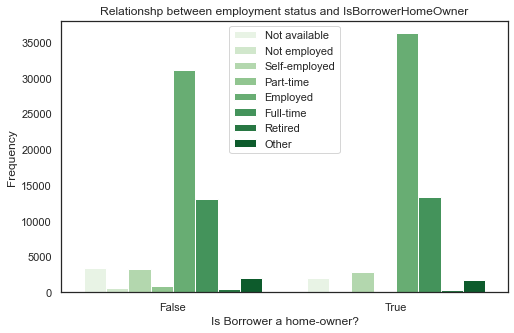

In [40]:
# relationship between employment status and IsBorrowerHomeOwner
plt.figure(figsize=[8,5])
sns.countplot(data=loans, x='IsBorrowerHomeowner', hue='EmploymentStatus', palette='Greens')
plt.legend(ncol=1)
plt.title('Relationshp between employment status and IsBorrowerHomeOwner')
plt.xlabel('Is Borrower a home-owner?')
plt.ylabel('Frequency');

Employed folks make up the majority of borrowers that own a home. Interestingly, it's also the same for borrowers that don't own any.

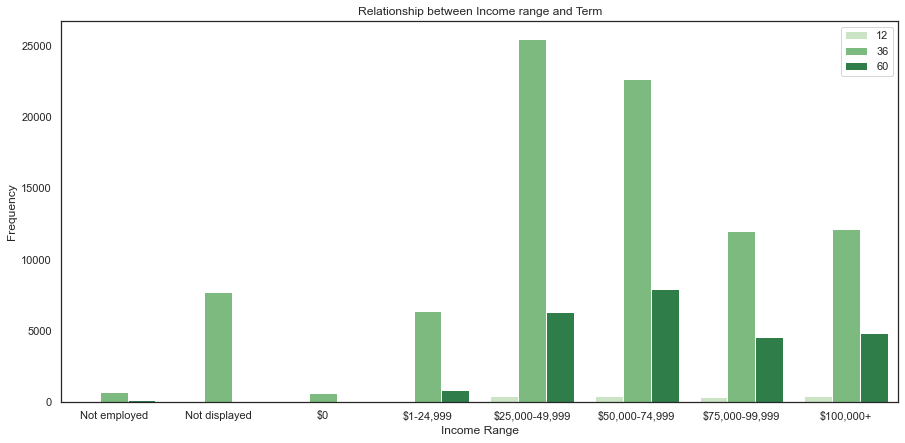

In [41]:
# term vs IncomeRange relationship
plt.figure(figsize=[15,7])
sns.countplot(data=loans, x='IncomeRange', hue='Term', palette='Greens')
plt.legend(ncol=1)
plt.title('Relationship between Income range and Term')
plt.xlabel('Income Range')
plt.ylabel('Frequency');

Majority of borrowers who took the shortest loan term have an income range between 25k and 100k dollars. It shows that the higher earning borrowers took the shortest loan term available.

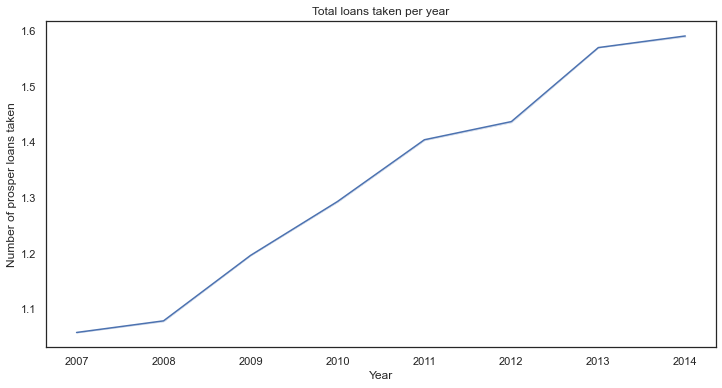

In [42]:
# Relationship between TotalProsperLoans Vs Year
plt.figure(figsize=[12,6])
sns.lineplot(data=loans, x='Year', y='TotalProsperLoans', palette='Blues', ci=0)
plt.title('Total loans taken per year')
plt.xlabel('Year')
plt.ylabel('Number of prosper loans taken');

Generally, a positive correlation exists between `TotalProsperLoans` and `Year`. The number of loans taken decreased from 2008 to 2009 before going up again in 2012 thereafter with 2014 becoming the year with the highest number of loans taken.

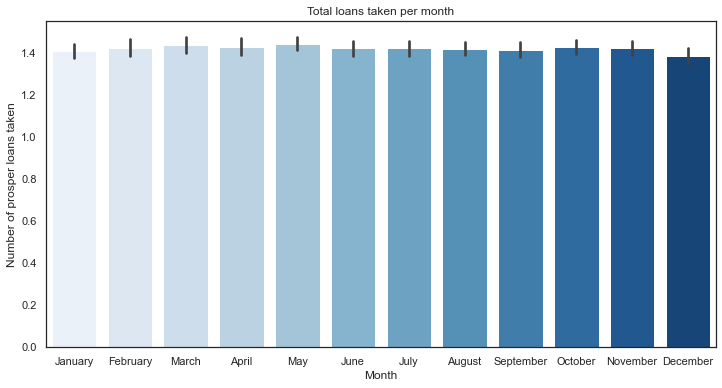

In [43]:
# Relationship between TotalProsperLoans Vs Month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=[12,6])
sns.barplot(data=loans, x='Month', y='TotalProsperLoans', palette='Blues', order=month_order)
plt.title('Total loans taken per month')
plt.xlabel('Month')
plt.ylabel('Number of prosper loans taken');

May is the month with the highest number of loans that were taken while borrowers seldom take loans at the end of the year.

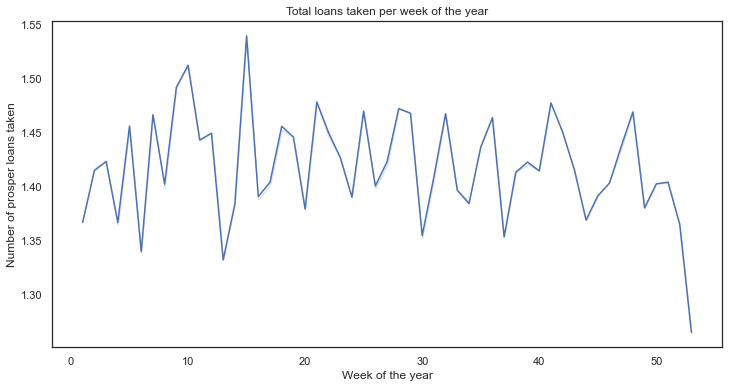

In [44]:
# Relationship between TotalProsperLoans Vs Week
plt.figure(figsize=[12,6])
sns.lineplot(data=loans, x='Week', y='TotalProsperLoans', palette='Blues', ci=0)
plt.title('Total loans taken per week of the year')
plt.xlabel('Week of the year')
plt.ylabel('Number of prosper loans taken');

The least number of loans was taken during the last weeks of the year.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- BorrowerAPR and BorrowerRate have a very high correlation.
- Investors have a correlation of 0.38 with LoanOriginalAMount.
- There is a positive correlation between Year and LoanOriginalAmount.
- The borrowers with the highest monthly income took the least number of loans while those with the most loans taken are the low income earners.
- It can also be noted that TotalProsperLoans is negatively correlated with StatedMonthlyIncome.
- The not displayed IncomeRange has a sizeable number of outliers
- Majority of borrowers who took the shortest loan term have an income range between 25k and 100k dollars. It shows that the higher earning borrowers took the shortest loan term available.
- Generally, a positive correlation exists between TotalProsperLoans and Year.
- May is the month with the highest number of loans that were taken while borrowers seldom take loans at the end of the year.
- The least number of loans was taken during the last weeks of the year.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- Employed folks make up the majority of borrowers that own a home.
- The higher earning borrowers took the shortest loan term available.

## Multivariate Exploration

Creating plots of three or more variables to investigate the data even further.

<Figure size 1440x1440 with 0 Axes>

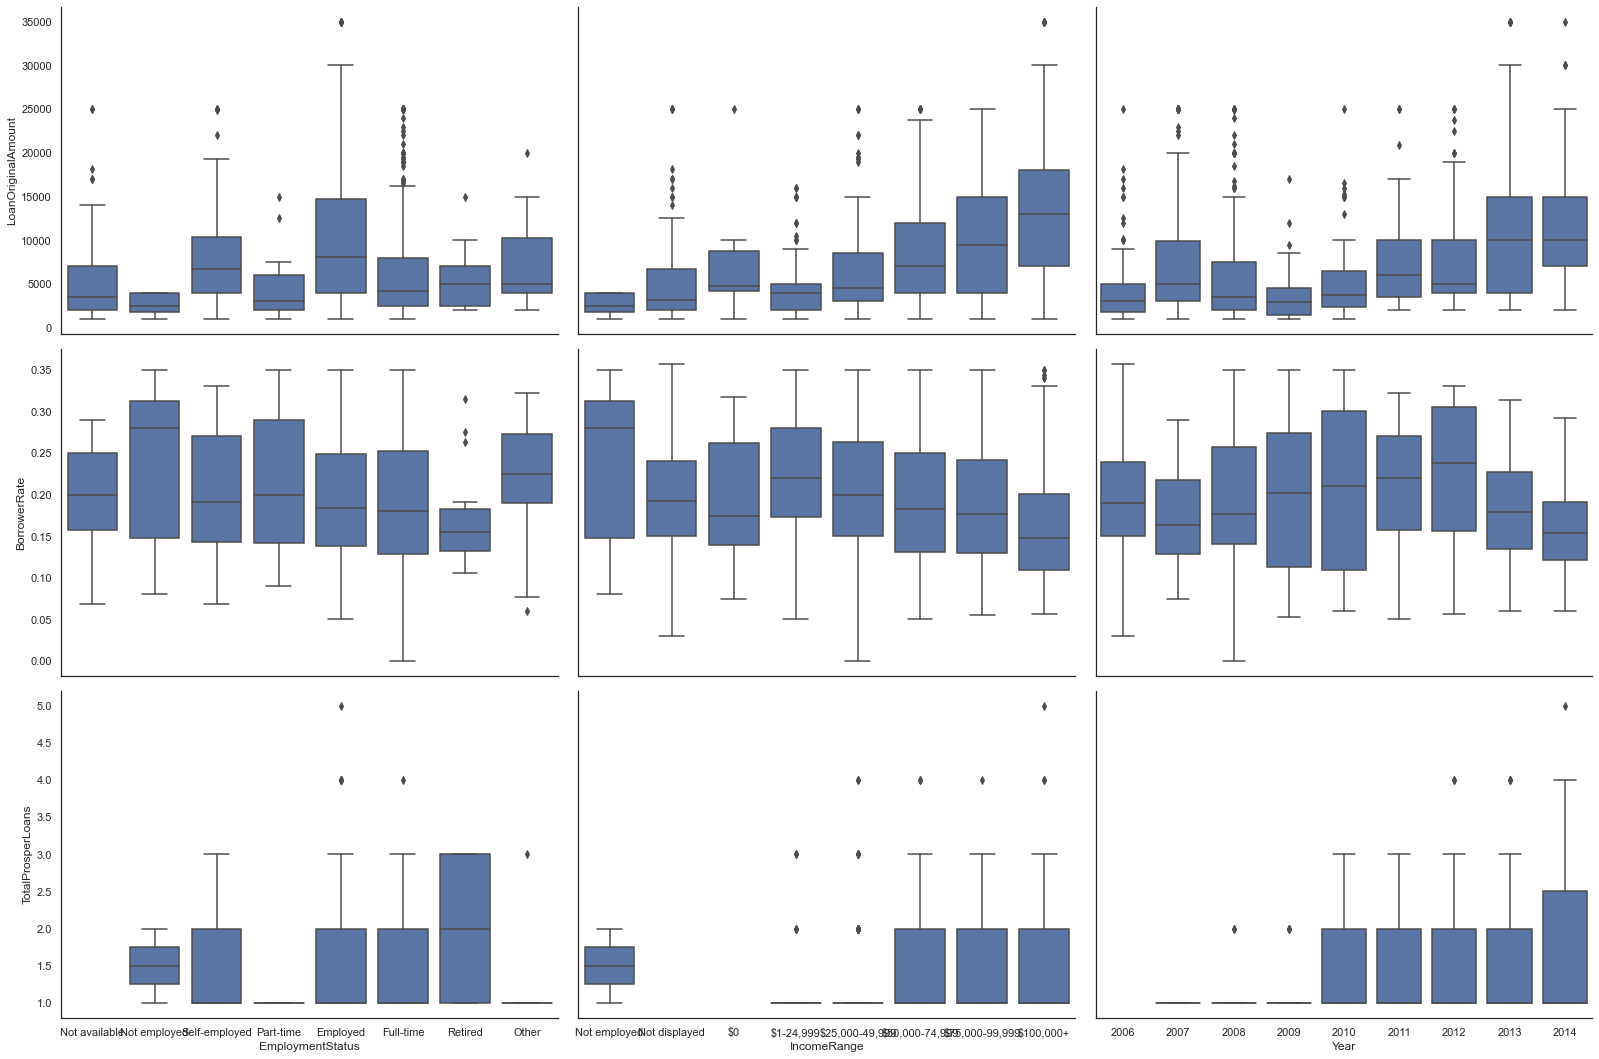

In [82]:
# plot matrix of numeric features against categorical features with only 2000 random samples taken
samples = np.random.choice(loans.shape[0], 2000, replace = False)
loans_samp = loans.loc[samples,:]
cat_vars = ['EmploymentStatus', 'IncomeRange', 'Year']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = loans_samp, y_vars = ['LoanOriginalAmount', 'BorrowerRate', 'TotalProsperLoans'], x_vars = cat_vars, size=5, aspect=1.5, height=5)
g.map(boxgrid)
plt.show();

It can be noted that IncomeRange and LoanOriginalAMount are positively correlated.

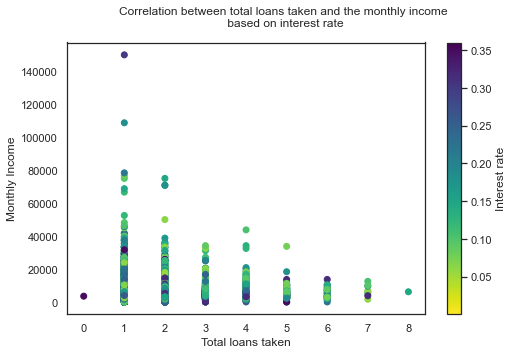

In [83]:
# relationship between TotalProsperLoans and StatedMonthlyIncome based on BorrowerRate
plt.figure(figsize = [8,5])
plt.scatter(data=loans, x='TotalProsperLoans', y='StatedMonthlyIncome', c='BorrowerRate', cmap='viridis_r')
plt.suptitle('Correlation between total loans taken and the monthly income\n based on interest rate')
plt.xlabel('Total loans taken')
plt.ylabel('Monthly Income')
plt.colorbar(label='Interest rate')
plt.show();

Borrowers with the least number of loans taken are the highest earners and they also have the highest interest rate (BorrowerRate). Generally, it can be observed that the more you take loans, the higher your interest rate(safe for the borrowers who took a single loan). This category of borrowers also have the lowest monthly income.

In [87]:
# fig = plt.figure(figsize = [15,7])
# ax = sns.pointplot(data = loans, y = 'Listing Category', x = 'StatedMonthlyIncome', hue = 'EmploymentStatus',
#            palette = 'Blues', linestyles = '', dodge = 0.4)
# plt.title('Monthly incomes across employment statuses and Income ranges')
# plt.ylabel('Monthly income')
# plt.show();

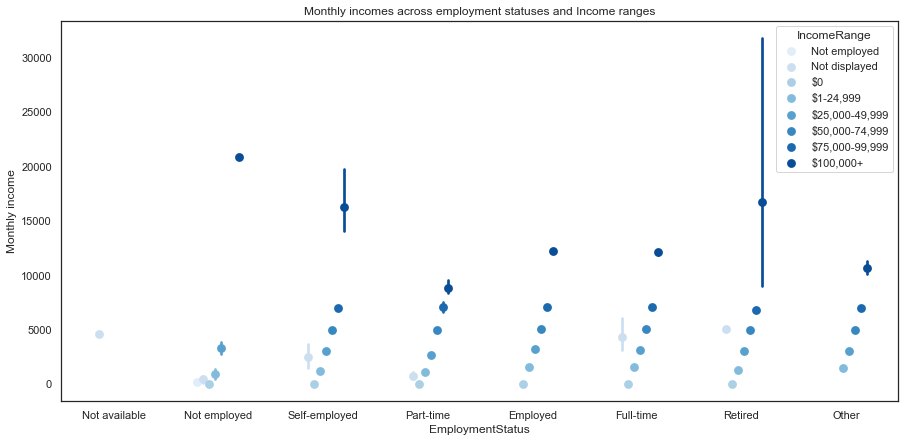

In [88]:
# Monthly incomes across employment statuses and Income ranges
fig = plt.figure(figsize = [15,7])
ax = sns.pointplot(data = loans, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Monthly incomes across employment statuses and Income ranges')
plt.ylabel('Monthly income')
plt.show();

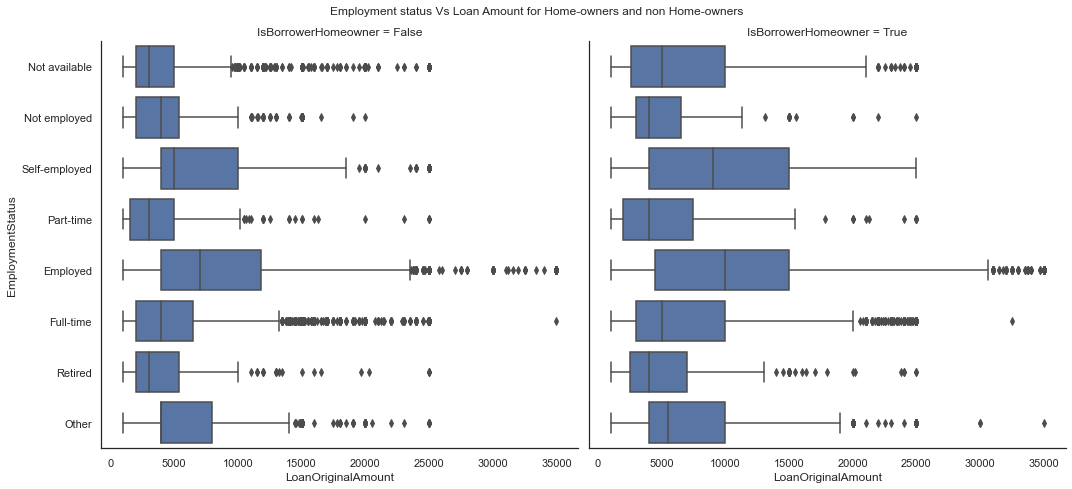

In [89]:
# Employment status Vs Loan Amount for Home-owners and non Home-owners
g = sns.FacetGrid(data=loans, col='IsBorrowerHomeowner', height=5, aspect=1.5, size=5)
g.map(sns.boxplot, 'LoanOriginalAmount', 'EmploymentStatus')
g.fig.set_size_inches(15, 7)
plt.suptitle('Employment status Vs Loan Amount for Home-owners and non Home-owners', y=1)
plt.show();

Borrowers who are either employed or Full-time and are home-owners tend to have more loan original amount. Also, self-employed borrowers who are home owners tend to have much loan original amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- It can be noted that IncomeRange and LoanOriginalAMount are positively correlated.
- Borrowers who are either employed or Full-time and are home-owners tend to have more loan original amount. Also, self-employed borrowers who are home owners tend to have much loan original amount.
- Generally, it can be observed that the more you take loans, the larger your interest rate.

### Were there any interesting or surprising interactions between features?
I noticed that folks who have a larger Income range tend to have the larger amount of loan original amount.

## Conclusions

For this project, my main task was to explore the features related to the borrowers and how it relates to the loans they took. <br>
I started off with the univariate exploration where I explored the distribution of individual features. I got some notable insights from this exploration such as the majority of borrowers originating from California. I also observed that most borrowers are either employed or Full-time. A little minority took their loans for a year while most took their for 36 months.Exploring the Listing Category further, majority of the loans was tajen for Debt consolidation. Taking a look at the ProsperLoans score, it can be seen that most borrowers have a not so good risk score of 4.0. <br><br>
Next I moved on to the Bivariate exploration where I investigated relationships between pairs of variables in the dataset. Using a heatmap, I explored the correlation of all numeric variables in the data and found out that BorrowerAPR and BorrowerRate are highly correlated. Looking down the chart, I observed Investors have a correlation of 0.38 with LoanOriginalAmount. I also observed that borrowers with the highest monthly income took the least number of loans while those
with the most loans taken are the low income earners. Exploring further, TotalProsperLoans is negatively correlated with StatedMonthlyIncome. Most borrowers also took loans in the month of May while very few loans were taken at the end of the year. <br><br>
Next, I moved on to the Multivariate exploration where I created plots of three or more variables to investigate the data even further. I used plot matrices to investigate the relationship between numeric features and categorical features in the data. I noted that IncomeRange and LoanOriginalAMount are positively correlated. I then checked the relationship between TotalProsperLoans and StatedMonthlyIncome based on BorrowerRate. Here, I observed that borrowers with the least number of loans taken are the highest earners and they also have the highest interest rate (BorrowerRate). I also noted that the more you take loans, the higher your interest rate(safe for the borrowers who took a single loan). Exploring the data further, I reviewed the relationship between Employment status and Loan Amount for Home-owners and non Home-owners. I found out that Borrowers who are either employed or Full-time and are home-owners tend to have more loan original amount. Also, self-employed borrowers who are home owners tend to have much loan original amount. An interesting interaction I noticed was that folks who have a larger Income range tend to have the larger amount of loan original amount. <br>
Finally, it was fun making this analysis and applying what I have learnt from the Data Visualization course of the Data Analyst Nanodegree to this exciting project. One issue I faced though was picking the best features from the many variables in the dataset for this analysis.